<a href="https://colab.research.google.com/github/FLafage/Cours_Python/blob/main/Copie_de_Test_duckdb_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Devoir de François pour tester duckdb en python**

In [ ]:
import pandas as pd
import geopandas as gpd
import duckdb

In [ ]:
url = "https://object.files.data.gouv.fr/data-pipeline-open/siren/stock/StockUniteLegale_utf8.parquet"

In [ ]:
duckdb.sql('SET enable_progress_bar = true;') # pour afficher la progress bar des requêtes

La première étape consiste à créer une vue pour éviter de réécrire chaque fois l'url

In [ ]:
duckdb.sql(f'CREATE OR REPLACE VIEW siren AS from read_parquet("{url}")')

La première requête : connaître le nombre de lignes (attention : le résultat est instantané)

In [ ]:
duckdb.sql('select count(*) from siren')

┌──────────────┐
│ count_star() │
│    int64     │
├──────────────┤
│     29095403 │
└──────────────┘

Attention, ici on cherche à décrire les variables de la table siren ! mais bon c'est encore raisonnable. C'est beaucoup plus long. La commande .df permet de convertir le résultat d'une requête duckcb en pandas.

In [ ]:
duckdb.sql("SUMMARIZE siren").df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,column_name,column_type,min,max,approx_unique,avg,std,q25,q50,q75,count,null_percentage
0,siren,VARCHAR,000325175,999992357,27866277,None,None,None,None,None,29095403,0.00
1,statutDiffusionUniteLegale,VARCHAR,O,P,2,None,None,None,None,None,29095403,0.00
2,unitePurgeeUniteLegale,BOOLEAN,true,true,1,None,None,None,None,None,29095403,85.34
3,dateCreationUniteLegale,DATE,0001-01-16,3023-01-06,32187,2005-12-15 18:36:50.969766,None,1995-03-30,2010-07-19,2020-01-02,29095403,4.03
4,sigleUniteLegale,VARCHAR,,€CO-MARKET,245263,None,None,None,None,None,29095403,87.79
5,sexeUniteLegale,VARCHAR,F,[ND],3,None,None,None,None,None,29095403,43.56
6,prenom1UniteLegale,VARCHAR,MILA,[ND],400422,None,None,None,None,None,29095403,43.52
7,prenom2UniteLegale,VARCHAR,,[ND],147447,None,None,None,None,None,29095403,74.12
8,prenom3UniteLegale,VARCHAR,,[ND],36200,None,None,None,None,None,29095403,83.87
9,prenom4UniteLegale,VARCHAR,,[ND],10219,None,None,None,None,None,29095403,89.72


Maintenant, on va compter toutes les entreprises aquacoles de mer avec le code APE 03.21Z

In [ ]:
duckdb.sql('''
    SELECT count(*)
    FROM siren
    WHERE activitePrincipaleUniteLegale = '03.21Z'
''')

┌──────────────┐
│ count_star() │
│    int64     │
├──────────────┤
│         5864 │
└──────────────┘

On va maintenant récupérer toutes les entreprises, c'est long, mais c'est possible (plus de 10 minutes).

In [ ]:
aqua_mer = duckdb.sql('''
    SELECT *
    FROM siren
    WHERE activitePrincipaleUniteLegale = '03.21Z'
    ''').df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Les devoirs donnés par François sont les suivants :

*   Calculer le nombre d'entreprises par activitePrincipaleUniteLegale
*   Calculer le nombre d'entreprises par categorieEntreprise

Puis prendre le fichier des https://www.data.gouv.fr/datasets/geolocalisation-des-etablissements-du-repertoire-sirene-pour-les-etudes-statistiques/informations des etablissements et calculer par commune le nombre d'établissements. Puis faire la carte ! Le fond de carte est ici https://creacartes.s3.eu-west-3.amazonaws.com/2025/francemetro/commune_francemetro_2025.gpkg Vous pouvez directement le charger avec l'url...

Calcul du nombre d'entreprises par activité principale

In [ ]:
nombre_entreprises_par_activite_principale = duckdb.sql('''
    SELECT
        activitePrincipaleUniteLegale, count(*)
    FROM siren
    GROUP BY activitePrincipaleUniteLegale
''').show()

BinderException: Binder Error: Referenced column "activitePrincipaleUniteLegale" not found in FROM clause!
Candidate bindings: "distance_precision", "qualite_iris", "siret", "y_latitude", "qualite_qva"

Calcul du nombre d'entreprises par categorieEntreprise

In [ ]:
nombre_entreprises_par_activite_entreprise = duckdb.sql('''
    SELECT
        categorieEntreprise, count(*)
    FROM siren
    GROUP BY categorieEntreprise
''').show()

┌─────────────────────┬──────────────┐
│ categorieEntreprise │ count_star() │
│       varchar       │    int64     │
├─────────────────────┼──────────────┤
│ NULL                │     18549210 │
│ PME                 │     10395070 │
│ GE                  │        43100 │
│ ETI                 │       108023 │
└─────────────────────┴──────────────┘



Calcul du nombre de commune par établissement

In [ ]:
url_etablissement = "https://object.files.data.gouv.fr/data-pipeline-open/siren/geoloc/GeolocalisationEtablissement_Sirene_pour_etudes_statistiques_utf8.parquet"

In [ ]:
duckdb.sql(f'CREATE OR REPLACE VIEW SIRET AS from read_parquet("{url_etablissement}")')

In [ ]:
nombre_etablissements_par_commune = duckdb.sql('''
    SELECT
        PLG_CODE_COMMUNE, count(*)
    FROM SIRET
    GROUP BY PLG_CODE_COMMUNE
''').df()

nombre_etablissements_par_commune

,plg_code_commune,count_star()
0,84007,79867
1,13042,6601
2,13204,31228
3,80025,125
4,80373,1187
...,...,...
34895,55034,28
34896,70269,6
34897,88374,16
34898,70496,10


Création de la carte :

In [ ]:
url_carte = "https://creacartes.s3.eu-west-3.amazonaws.com/2025/francemetro/commune_francemetro_2025.gpkg"

In [ ]:
carte = gpd.read_file(url_carte)

In [ ]:
carte.head()

,code,libelle,cheflieu,tncc,dct,dar,z20,duu20,aav20,typo_aav20,bv22,epc,ctcd,dep,reg,surf,geometry
0,46120,Gindou,0,0,4609,463,7607,None,None,None,46127,200035327,46D,46,76,15.64,"MULTIPOLYGON (((559665.006 6394016.048, 560484..."
1,46135,Labastide-du-Haut-Mont,0,0,4611,462,7619,None,123,Commune de la couronne,46251,200067361,46D,46,76,9.76,"MULTIPOLYGON (((627592.943 6414238.947, 627793..."
2,47054,Castelmoron-sur-Lot,0,0,4718,472,7532,47401,None,None,47323,244701405,47D,47,75,23.25,"MULTIPOLYGON (((496723.003 6374222.954, 497466..."
3,57198,Erstroff,0,1,5720,573,4416,None,None,None,57483,200067502,57D,57,44,5.03,"MULTIPOLYGON (((974862.005 6881482.032, 975481..."
4,57199,Escherange,0,1,5727,577,4424,None,LUX,Commune de la couronne,57323,245700695,57D,57,44,13.18,"MULTIPOLYGON (((920135.969 6928981.039, 920492..."


In [ ]:
carte_nbr_entreprises_commune = carte.merge(nombre_etablissements_par_commune, left_on="code", right_on="plg_code_commune")

carte_nbr_entreprises_commune

,code,libelle,cheflieu,tncc,dct,dar,z20,duu20,aav20,typo_aav20,bv22,epc,ctcd,dep,reg,surf,geometry,plg_code_commune,count_star()
0,46120,Gindou,0,0,4609,463,7607,None,None,None,46127,200035327,46D,46,76,15.64,"MULTIPOLYGON (((559665.006 6394016.048, 560484...",46120,200
1,46135,Labastide-du-Haut-Mont,0,0,4611,462,7619,None,123,Commune de la couronne,46251,200067361,46D,46,76,9.76,"MULTIPOLYGON (((627592.943 6414238.947, 627793...",46135,67
2,47054,Castelmoron-sur-Lot,0,0,4718,472,7532,47401,None,None,47323,244701405,47D,47,75,23.25,"MULTIPOLYGON (((496723.003 6374222.954, 497466...",47054,843
3,57198,Erstroff,0,1,5720,573,4416,None,None,None,57483,200067502,57D,57,44,5.03,"MULTIPOLYGON (((974862.005 6881482.032, 975481...",57198,63
4,57199,Escherange,0,1,5727,577,4424,None,LUX,Commune de la couronne,57323,245700695,57D,57,44,13.18,"MULTIPOLYGON (((920135.969 6928981.039, 920492...",57199,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34741,33467,Saint-Quentin-de-Caplong,0,0,3327,335,7504,None,360,Commune de la couronne,33402,243301371,33D,33,75,11.24,"MULTIPOLYGON (((471304.039 6415854.964, 471369...",33467,199
34742,33466,Saint-Quentin-de-Baron,0,0,3310,335,7516,33701,006,Commune de la couronne,33243,200070092,33D,33,75,8.84,"MULTIPOLYGON (((438514.059 6416986.966, 439679...",33466,887
34743,33465,Saint-Pierre-de-Mons,0,0,3329,333,7514,33304,006,Commune de la couronne,33227,200043974,33D,33,75,9.08,"MULTIPOLYGON (((442930.993 6389672.98, 444489....",33465,424
34744,33464,Saint-Pierre-de-Bat,0,0,3312,333,7514,None,None,None,33081,200069599,33D,33,75,8.97,"MULTIPOLYGON (((443021.994 6401873.021, 443749...",33464,153


<Axes: >

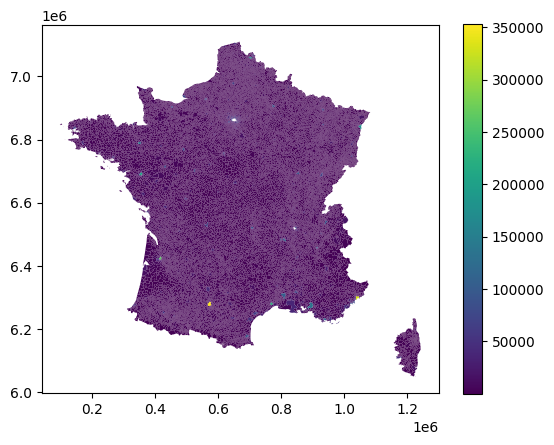

In [ ]:
carte_nbr_entreprises_commune.plot(
    column='count_star()',
    legend=True
)